In [1]:
#pip install nltk

In [2]:
import seaborn as sn
import numpy as np 
import pandas as pd 
import re
import nltk 
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
reddit_comments = pd.read_csv("updated_total_reddit_comments_NB.csv")
reddit_comments

,score,body
0,Neutral,When are the deposits suppose to hit? Do you h...
1,Positive,Wow 😂😂
2,Neutral,Everyone from fomo Tuesday last week will star...
3,Neutral,Use Uphold app to purchase more doge !
4,Positive,200k @ 0.007 been holding strong!
...,...,...
521847,Neutral,Give Eth a glass of milk
521848,Neutral,"we have each other, right?"
521849,Positive,It seems like a lot of people are thinking we’...
521850,Negative,Last night watching ADA rise I was stressing o...


In [4]:
features = reddit_comments['body']
labels = reddit_comments['score']

In [5]:
processed_features = []

for sentence in range(0, len(features)):
    # Remove all the special characters
    processed_feature = re.sub(r'\W', ' ', str(features[sentence]))

    # remove all single characters
    processed_feature= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)

    # Remove single characters from the start
    processed_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature) 

    # Substituting multiple spaces with single space
    processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I)

    # Removing prefixed 'b'
    processed_feature = re.sub(r'^b\s+', '', processed_feature)

    # Converting to Lowercase
    processed_feature = processed_feature.lower()

    processed_features.append(processed_feature)

In [6]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer (max_features=2500, min_df=7, max_df=0.8, stop_words=stopwords.words('english'))
processed_features = vectorizer.fit_transform(processed_features).toarray()

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

classifiers = {
    "Naive Bayes": GaussianNB(),
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),}

In [8]:
X_train, X_test, y_train, y_test = train_test_split(processed_features, labels, test_size=0.2, random_state=0)

In [ ]:
f, axes = plt.subplots(1, 5, figsize=(20, 5), sharey='row')
for i, (key, classifier) in enumerate(classifiers.items()):
    y_pred = classifier.fit(X_train, y_train).predict(X_test)
    cf_matrix = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(cf_matrix,
                                  display_labels=labels)
    disp.plot(ax=axes[i], xticks_rotation=45)
    disp.ax_.set_title(key)
    disp.im_.colorbar.remove()
    disp.ax_.set_xlabel('')
    if i!=0:
        disp.ax_.set_ylabel('')

f.text(0.4, 0.1, 'Predicted label', ha='left')
plt.subplots_adjust(wspace=0.40, hspace=0.1)


f.colorbar(disp.im_, ax=axes)
plt.show()


In [ ]:
text_classifier = RandomForestClassifier(n_estimators=30, random_state=0)
text_classifier.fit(X_train, y_train)

In [10]:
predictions = text_classifier.predict(X_test)

In [16]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
array = (confusion_matrix(y_test,predictions))
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

[[11612  2978  4172]
 [  742 42804  1316]
 [ 2469  3426 34852]]
              precision    recall  f1-score   support

    Negative       0.78      0.62      0.69     18762
     Neutral       0.87      0.95      0.91     44862
    Positive       0.86      0.86      0.86     40747

    accuracy                           0.86    104371
   macro avg       0.84      0.81      0.82    104371
weighted avg       0.85      0.86      0.85    104371

0.8552950532235966


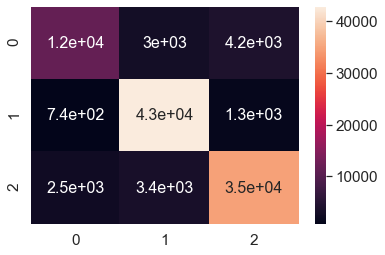

In [20]:
plot_confusion_matrix(cm           = array 
                      normalize    = False,
                      target_names = ['negative', 'neutral', 'positive'],
                      title        = "Confusion Matrix")

In [ ]:
plot_confusion_matrix(cm           = array 
                      normalize    = True,
                      target_names = ['negative', 'neutral', 'positive'],
                      title        = "Confusion Matrix")